In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural Network
from keras.models import Sequential
from keras.layers import Dense

# My modules
from modules.efficiency_matrix import effmatrix

C:\Users\jfcre\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
seed = 11
np.random.seed(seed)

#### Functions for use below:

In [3]:
def observe(oneN,twoN):
    oneN_obs = 0
    twoN_obs = 0
    for n in range(oneN):
        rand = np.random.random()
        if rand < M.item(0,0):
            oneN_obs += 1
    for n in range(twoN):
        rand = np.random.random()
        if rand < M.item(0,1):
            oneN_obs += 1
        elif rand < M.item(0,1) + M.item(1,1):
            twoN_obs += 1
    return oneN_obs,twoN_obs

In [4]:
def scatter_to_hist(xarray,yarray):
    
    nbins = (NN_x_max + 1)*(NN_y_max + 1)
    hist = np.zeros(nbins)
    
    for i in range(len(xarray)):
        x = xarray[i]
        y = yarray[i]
        
        if oneN > 0 or twoN > 0:
            j = x + (NN_x_max + 1)*y
            hist[j] += 1
            
    return hist


def hist_to_scatter(array, integral=1):
    
    x_array = []
    y_array = []
    
    if integral == 1:
        cut = 0
    else:
        # Selecting the appropriate cut
        sort = -np.sort(-array)
        tot_prob = 0
        for i in sort:
            tot_prob += i
            if tot_prob >= integral:
                cut = i
                break
    
    for i in range(len(array)):
        if array[i] > cut:
            # calculate x,y values from index
            xval = i % (NN_x_max + 1)
            yval = i // (NN_x_max + 1)
            # add x,y to arrays for scatter plot
            x_array.append(xval)
            y_array.append(yval)
            
    return x_array,y_array

#### Creating Neural Network

In [5]:
TruthValues=[[72, 48],[40, 12],[16, 0]]

In [6]:
Truth1n = TruthValues[0][0]
Truth2n = TruthValues[0][1]

In [7]:
# sample region
min1n = 10
max1n = int(Truth1n+3*np.sqrt(Truth1n)+0.5)
min2n = 0
max2n = int(Truth2n+3*np.sqrt(Truth2n)+0.5)

# plot size
x_max = int(max1n+7*np.sqrt(max1n)+0.5)
y_max = int(max2n+7*np.sqrt(max2n)+0.5)

# plot size for NN
# (takes too much memory to do full size)
NN_x_max = 70
NN_y_max = 70

# how many times we sample the 2D-poisson dist. at a given (1n,2n) truth value
nsamples = 10000

# HALO efficiency matrix
M = effmatrix()

xincr = max(int(max1n/NN_x_max+0.5),1)
yincr = max(int(max2n/NN_y_max+0.5),1)

In [8]:
"""
oneNtruth_set = []
twoNtruth_set = []
oneNobs_set   = []
twoNobs_set   = []

for i in range(min1n,max1n+1,xincr):
    for j in range(min2n,max2n+1,yincr):
        
        oneNtruth = []
        twoNtruth = []
        oneNobs   = []
        twoNobs   = []

        for k in range(nsamples):
            
            # truth distribution
            oneN = np.random.poisson(i)
            twoN = np.random.poisson(j)

            # calculate observed distribution
            oneN_obs,twoN_obs = observe(oneN,twoN)

            oneNtruth.append(oneN)
            twoNtruth.append(twoN)
            oneNobs.append(oneN_obs)
            twoNobs.append(twoN_obs)

        # add arrays to sets
        oneNtruth_set.append(oneNtruth)
        twoNtruth_set.append(twoNtruth)
        oneNobs_set.append(oneNobs)
        twoNobs_set.append(twoNobs)
"""

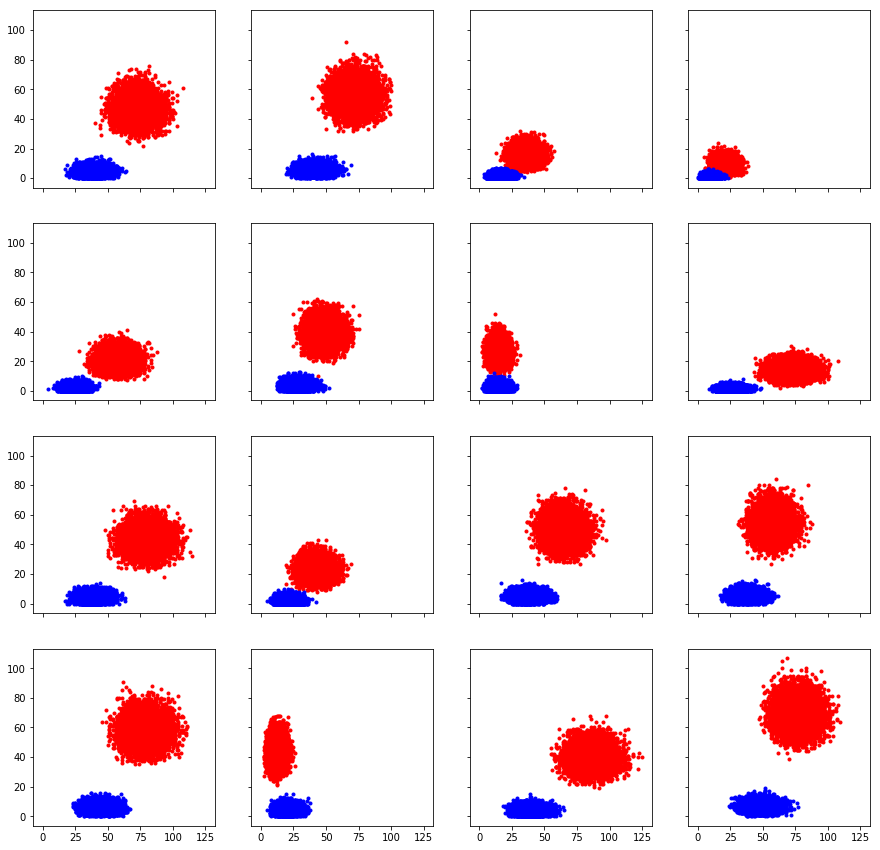

In [9]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharex=True, sharey=True, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.2)

axs = axs.ravel()

for plot_ in range(16):
    
    plot_num = np.random.randint(0,len(oneNtruth_set))
            
    axs[plot_].scatter(oneNtruth_set[plot_num],twoNtruth_set[plot_num],c='r',marker='.',alpha=1)
    axs[plot_].scatter(oneNobs_set[plot_num],twoNobs_set[plot_num],c='b',marker='.',alpha=1)

In [10]:
# scale everything down to NN size
xscale = NN_x_max/x_max
yscale = NN_y_max/y_max
    
oneNtruth_set_scaled = np.array([np.array(i)*xscale for i in oneNtruth_set]).astype(int)
twoNtruth_set_scaled = np.array([np.array(i)*yscale for i in twoNtruth_set]).astype(int)
oneNobs_set_scaled   = np.array([np.array(i)*xscale for i in oneNobs_set]).astype(int)
twoNobs_set_scaled   = np.array([np.array(i)*yscale for i in twoNobs_set]).astype(int)

In [11]:
truth_set = []
obs_set   = []

# add truths,observations to arrays
for i in range(len(oneNtruth_set_scaled)):
    
    oneNtruth = oneNtruth_set_scaled[i]
    twoNtruth = twoNtruth_set_scaled[i]
    oneNobs   = oneNobs_set_scaled[i]
    twoNobs   = twoNobs_set_scaled[i]
    
    truth = scatter_to_hist(oneNtruth,twoNtruth)
    obs   = scatter_to_hist(oneNobs,twoNobs)
    
    # add arrays to set
    truth_set.append(truth)
    obs_set.append(obs)


In [12]:
scaler = StandardScaler()
# Fit the scaler
scaler.fit(obs_set)
# standardize the data
obs_set = scaler.transform(obs_set)

In [13]:
width = (NN_x_max+1)*(NN_y_max+1) # how many nodes in input
epochs = 4
batch_size = 32

model = Sequential()
model.add(Dense(width, input_dim=width, kernel_initializer='normal', activation='relu'))
model.add(Dense(width, kernel_initializer='normal', activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(obs_set, np.array(truth_set), epochs=epochs, batch_size=batch_size,verbose=1)

Epoch 1/4
6160/6160 [==============================] - 184s 30ms/step - loss: 12.7230 - acc: 0.9371
Epoch 2/4
6160/6160 [==============================] - 180s 29ms/step - loss: 11.9458 - acc: 0.9371
Epoch 3/4
6160/6160 [==============================] - 194s 31ms/step - loss: 11.5841 - acc: 0.9371
Epoch 4/4
6160/6160 [==============================] - 188s 30ms/step - loss: 11.3194 - acc: 0.9371


In [14]:
unfolded_set = model.predict(obs_set)

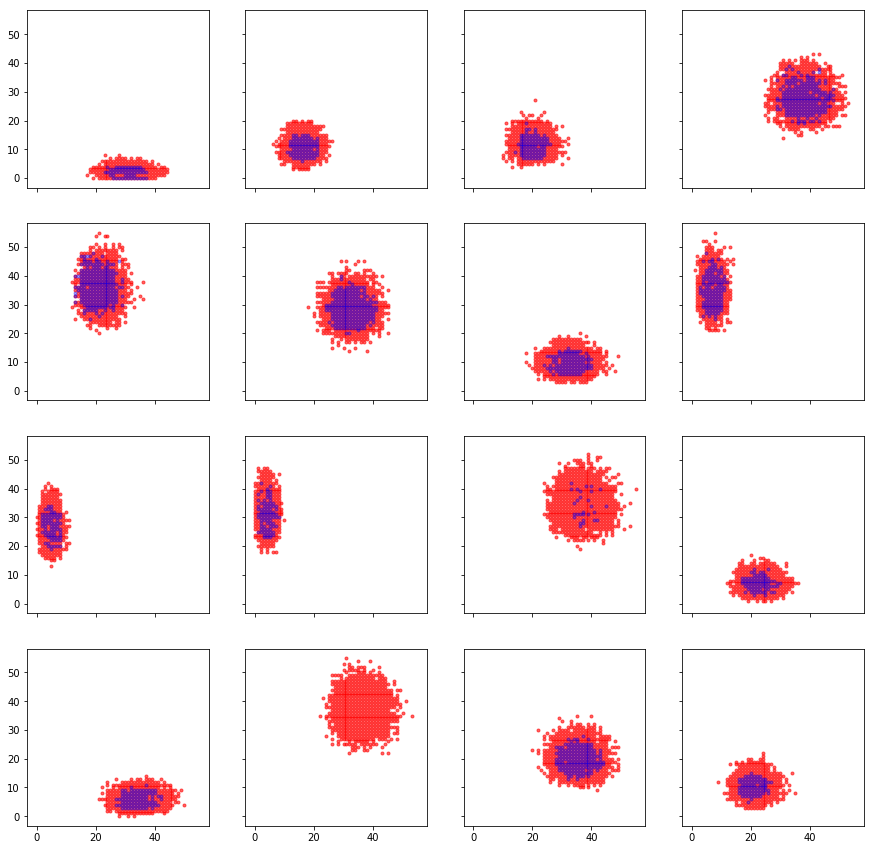

In [15]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), sharex=True, sharey=True, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.2, wspace=0.2)

axs = axs.ravel()

for plot_ in range(16):
    
    plot_num = np.random.randint(0,len(unfolded_set))
    unfolded_plot = unfolded_set[plot_num]
    truth_plot = truth_set[plot_num]

    # arrays for scatter plot
    x_unfolded, y_unfolded = hist_to_scatter(unfolded_plot,integral=0.9)
    x_truth, y_truth = hist_to_scatter(truth_plot)
            
    axs[plot_].scatter(x_truth,y_truth,c='r',marker='.',alpha=0.6)
    axs[plot_].scatter(x_unfolded,y_unfolded,c='b',marker='.',alpha=0.35)
    

-------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------

#### Unfolding

In [24]:
def unfold(Truth1n,Truth2n):
    
    # First generate a truth and observed distribution
    # -------------------------------------------------------
    oneNtruth = []
    twoNtruth = []
    oneNobs   = []
    twoNobs   = []

    for k in range(nsamples):

        # truth distribution
        oneN = np.random.poisson(Truth1n)
        twoN = np.random.poisson(Truth2n)

        # calculate observed distribution
        oneN_obs,twoN_obs = observe(oneN,twoN)

        oneNtruth.append(oneN)
        twoNtruth.append(twoN)
        oneNobs.append(oneN_obs)
        twoNobs.append(twoN_obs)
        
    # Second create data array for the neural network
    # -------------------------------------------------------

    # scale data down to Neural Network size
    xscale = NN_x_max/x_max
    yscale = NN_y_max/y_max
    oneNobs_scaled   = [int(i*xscale) for i in oneNobs]
    twoNobs_scaled   = [int(i*yscale) for i in twoNobs]
    
    # convert scatter plot to array
    obs = scatter_to_hist(oneNobs_scaled,twoNobs_scaled)
    
    # need an array of length batch_size
    obs_set = np.array([obs for i in range(batch_size)])
    
    # standardize the data
    obs_set = scaler.transform(obs_set)

    # Third unfold and plot the results
    # ------------------------------------------------------- 
    unfolded_set = model.predict(obs_set)
    unfolded = unfolded_set[0]
    
    # convert back to scatter plot
    x_unfolded, y_unfolded = hist_to_scatter(unfolded,integral=0.90)

    # rescale back to full size
    x_unfolded = [i/xscale for i in x_unfolded]
    y_unfolded = [i/yscale for i in y_unfolded]
    
    # Plot the results vs truth

    fig, ax = plt.subplots(1,1,figsize=(8,6))

    ax.scatter(oneNtruth,twoNtruth,c='r',marker='.',alpha=0.3)
    ax.scatter(x_unfolded,y_unfolded,c='b',marker='.',alpha=0.65)
    ax.scatter(Truth1n,Truth2n,c='white',marker='*',s=250)
    ax.set_xlim(0,2*Truth1n)
    ax.set_ylim(0,2*Truth2n)
    
    plt.show()
    return x_unfolded,y_unfolded


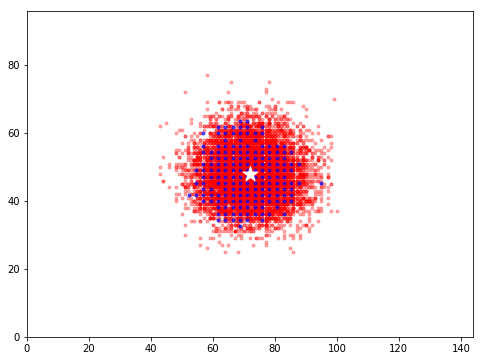

In [33]:
x_unfolded_1, y_unfolded_1 = unfold(TruthValues[0][0],TruthValues[0][1])
save = [x_unfolded_1, y_unfolded_1]
np.save('./unfolded_data/halo1_5kpc_72v48_unfolded_NN.npy',save)

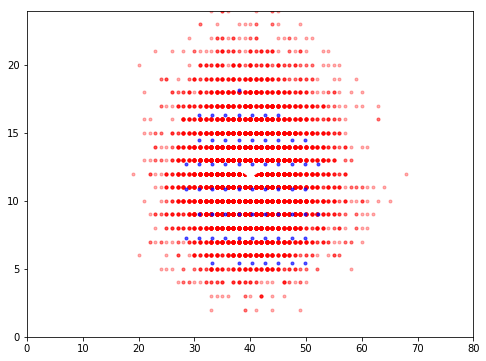

In [37]:
x_unfolded_2, y_unfolded_2 = unfold(TruthValues[1][0],TruthValues[1][1])
save = [x_unfolded_2, y_unfolded_2]
np.save('./unfolded_data/halo1_5kpc_40v12_unfolded_NN.npy',save)

C:\Users\jfcre\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0, top=0
  'bottom=%s, top=%s') % (bottom, top))


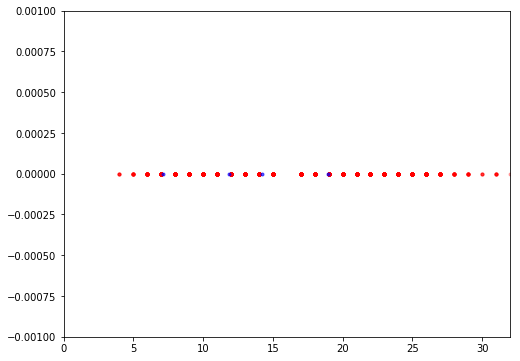

In [29]:
x_unfolded_3, y_unfolded_3 = unfold(TruthValues[2][0],TruthValues[2][1])

In [38]:
xx,yy = np.load('./unfolded_data/halo1_5kpc_72v48_unfolded_NN.npy')
save = [x_unfolded_3, y_unfolded_3]
np.save('./unfolded_data/halo1_5kpc_16v0_unfolded_NN.npy',save)